In [1]:
import pandas as pd
import seaborn as sns

file_path = "vdjdb_full.txt"
df = pd.read_csv(file_path, delimiter='\t')
df = df.drop_duplicates()
print(df.shape)


(61636, 34)


C:\Users\vikra\AppData\Local\Temp\ipykernel_3820\2714090035.py:5: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')


In [2]:
df.head(5)

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701...",NaN,NaN,"{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,NaN,"{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*02,HLA-A*24:02;HLA-B*08:01,HLA-B*15;HLA-...",NaN,NaN,"{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2
3,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAVKASGSRLT"", ""cdr3_old"": ""CAVKASGSR...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2


In [3]:
epitopes = df['antigen.gene'].unique()
print(f'{len(df["antigen.gene"].unique())} epitopes')


269 epitopes


In [4]:
epitope_frequencies = df['antigen.gene'].value_counts()
print(epitope_frequencies[0:10])

IE1      14126
pp65      8595
M         7891
Gag       3372
Spike     2964
EBNA4     2539
MLANA     2366
BZLF1     1610
NS3       1574
BMLF1     1476
Name: antigen.gene, dtype: int64


In [5]:
print(df.columns)

Index(['cdr3.alpha', 'v.alpha', 'j.alpha', 'cdr3.beta', 'v.beta', 'd.beta',
       'j.beta', 'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope',
       'antigen.gene', 'antigen.species', 'reference.id',
       'method.identification', 'method.frequency', 'method.singlecell',
       'method.sequencing', 'method.verification', 'meta.study.id',
       'meta.cell.subset', 'meta.subject.cohort', 'meta.subject.id',
       'meta.replica.id', 'meta.clone.id', 'meta.epitope.id', 'meta.tissue',
       'meta.donor.MHC', 'meta.donor.MHC.method', 'meta.structure.id',
       'cdr3fix.alpha', 'cdr3fix.beta', 'vdjdb.score'],
      dtype='object')


In [6]:
#create new df of only cdr3 and relevant epitope columns with score greater than 0
df = df[(df['vdjdb.score'] > 0)]
df.dropna(subset=['cdr3.alpha'], inplace = True)
df = df[df['species']== 'HomoSapiens']
df.drop_duplicates(inplace=True)
df_slim = df[['cdr3.alpha','species','antigen.epitope','antigen.gene','vdjdb.score']]

In [7]:
print(df_slim.head(5))
print(df_slim.shape)

       cdr3.alpha      species antigen.epitope antigen.gene  vdjdb.score
0   CIVRAPGRADMRF  HomoSapiens        FLKEKGGL          Nef            2
2  CAVPSGAGSYQLTF  HomoSapiens        FLKEKGGL          Nef            2
3     CAVKASGSRLT  HomoSapiens        FLKEKGGL          Nef            2
4   CAYRPPGTYKYIF  HomoSapiens        FLKEKGGL          Nef            2
5   CIVRAPGRADMRF  HomoSapiens        FLKEQGGL          Nef            2
(2886, 5)


In [8]:
#Stick CRD3 together if both alpha and beta present if not leave alone
#df_slim['cdr3combined'] = df_slim['cdr3.alpha'].fillna('') + df_slim['cdr3.beta'].fillna('')


In [9]:
df_slim = df_slim.sort_values('antigen.epitope')
print(df_slim.head(3))
#print(cdr3comb.head(3))

            cdr3.alpha      species antigen.epitope antigen.gene  vdjdb.score
19745  CALATHTGTASKLTF  HomoSapiens       AAFKRSCLK         T-Ag            3
19742     CVVNGNNNDMRF  HomoSapiens       AAFKRSCLK         T-Ag            3
19743     CVVNNNNNDMRF  HomoSapiens       AAFKRSCLK         T-Ag            3


In [17]:
epitope_counts = df_slim['antigen.epitope'].value_counts()
filtered_epitopes = (epitope_counts[epitope_counts>43]).index.to_list()
print(len(filtered_epitopes))

10


In [18]:
df_slim = df_slim[df_slim['antigen.epitope'].isin(filtered_epitopes)]
cdr3comb = df_slim['cdr3.alpha'].dropna()
cdr3comb = cdr3comb.reset_index(drop=True)
df_slim.head()

,cdr3.alpha,species,antigen.epitope,antigen.gene,vdjdb.score
53115,CSPQGGSEKLVF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
53113,CASKAAGNKLTF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
53112,CASDYGGSQRNLVF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
53214,CAASDGMAGNMLTF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,2
53116,CTFDNQGGTALIF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1


In [19]:
import sys, os
import numpy as np
from Bio.Align import substitution_matrices
substitution_matrix = substitution_matrices.load('BLOSUM62')  # use matrix names to load
from sklearn.manifold import MDS

In [20]:
#parameter Settings
Ndim=16 #the optimal dimension for isometric representation is 16 
n0=Ndim*6
ZERO=np.zeros((Ndim,Ndim))
II=np.eye(Ndim)
M0=np.concatenate((np.concatenate((ZERO,ZERO, II),axis=1),np.concatenate((II, ZERO, ZERO),axis=1),np.concatenate((ZERO,II, ZERO),axis=1)))
## Construct 6-th order cyclic group
ZERO45=np.zeros((Ndim*3,Ndim*3))
#M6 is the determined omega matrix
M6=np.concatenate((np.concatenate((ZERO45,M0),axis=1),np.concatenate((M0, ZERO45),axis=1)))

In [21]:
#the adjusted blosum62 matrix, the diagonal valyes are set 4
bl62={'A':[4,-1,-2,-2,0,-1,-1,0,-2,-1,-1,-1,-1,-2,-1,1,0,-3,-2,0],
      'R':[-1,4,0,-2,-3,1,0,-2,0,-3,-2,2,-1,-3,-2,-1,-1,-3,-2,-3],
      'N':[-2,0,4,1,-3,0,0,0,1,-3,-3,0,-2,-3,-2,1,0,-4,-2,-3],
      'D':[-2,-2,1,4,-3,0,2,-1,-1,-3,-4,-1,-3,-3,-1,0,-1,-4,-3,-3],
      'C':[0,-3,-3,-3,4,-3,-4,-3,-3,-1,-1,-3,-1,-2,-3,-1,-1,-2,-2,-1],
      'Q':[-1,1,0,0,-3,4,2,-2,0,-3,-2,1,0,-3,-1,0,-1,-2,-1,-2],
      'E':[-1,0,0,2,-4,2,4,-2,0,-3,-3,1,-2,-3,-1,0,-1,-3,-2,-2],
      'G':[0,-2,0,-1,-3,-2,-2,4,-2,-4,-4,-2,-3,-3,-2,0,-2,-2,-3,-3],
      'H':[-2,0,1,-1,-3,0,0,-2,4,-3,-3,-1,-2,-1,-2,-1,-2,-2,2,-3],
      'I':[-1,-3,-3,-3,-1,-3,-3,-4,-3,4,2,-3,1,0,-3,-2,-1,-3,-1,3],
      'L':[-1,-2,-3,-4,-1,-2,-3,-4,-3,2,4,-2,2,0,-3,-2,-1,-2,-1,1],
      'K':[-1,2,0,-1,-3,1,1,-2,-1,-3,-2,4,-1,-3,-1,0,-1,-3,-2,-2],
      'M':[-1,-1,-2,-3,-1,0,-2,-3,-2,1,2,-1,4,0,-2,-1,-1,-1,-1,1],
      'F':[-2,-3,-3,-3,-2,-3,-3,-3,-1,0,0,-3,0,4,-4,-2,-2,1,3,-1],
      'P':[-1,-2,-2,-1,-3,-1,-1,-2,-2,-3,-3,-1,-2,-4,4,-1,-1,-4,-3,-2],
      'S':[1,-1,1,0,-1,0,0,0,-1,-2,-2,0,-1,-2,-1,4,1,-3,-2,-2],
      'T':[0,-1,0,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-2,-1,1,4,-2,-2,0],
      'W':[-3,-3,-4,-4,-2,-2,-3,-2,-2,-3,-2,-3,-1,1,-4,-3,-2,4,2,-3],
      'Y':[-2,-2,-2,-3,-2,-1,-2,-3,2,-1,-1,-2,-1,3,-3,-2,-2,2,4,-1],
      'V':[0,-3,-3,-3,-1,-2,-2,-3,-3,3,1,-2,1,-1,-2,-2,0,-3,-1,4]}

In [22]:
#let X to be the collection of MDS encoded embedding vectors for each of amino acid, which has a dimensionality of 16
#THIS IS DEFINED IN GIANA AS DEAFULT VALUES
X=np.array([[-0.31230882, -0.53572156, -0.01949946, -0.12211268, -0.70947917,
        -0.42211092,  0.02783931,  0.02637933, -0.41760305,  0.21809875,
         0.53532768,  0.04833016,  0.07877711,  0.50464914, -0.26972087,
        -0.52416842],
       [ 0.29672002,  0.29005364,  0.18176298, -0.05103382, -0.34686519,
         0.58024228, -0.49282931,  0.62304281, -0.09575202,  0.30115555,
         0.09913529,  0.1577466 , -0.94391939, -0.10505925,  0.05482389,
         0.38409897],
       [-0.42212537,  0.12225749,  0.16279646,  0.60099009,  0.19734216,
         0.42819919, -0.33562418,  0.17036334,  0.4234109 ,  0.46681561,
        -0.50347222, -0.37936876,  0.1494825 ,  0.32176759,  0.28584684,
         0.68469861],
       [ 0.18599294, -0.44017825, -0.4476952 ,  0.34340976,  0.44603553,
         0.40974629, -0.60045935, -0.09056728,  0.22147919, -0.33029418,
         0.55635594, -0.54149972,  0.05459062,  0.57334159, -0.06227118,
         0.65299872],
       [-0.19010428,  0.64418792, -0.85286762,  0.21380295,  0.37639516,
        -0.67753593,  0.38751609,  0.55746524,  0.01443766,  0.1776535 ,
         0.62853954, -0.15048523,  0.55100206, -0.21426656,  0.3644061 ,
        -0.0018255 ],
       [ 0.7350723 ,  0.10111267,  0.55640019, -0.18226966,  0.51658102,
        -0.19321508, -0.46599027, -0.02989911,  0.4036196 , -0.11978213,
        -0.29837524, -0.30232765, -0.36738065, -0.1379793 ,  0.04362871,
         0.33553714],
       [ 0.41134047,  0.13512443,  0.62492322, -0.10120261, -0.03093491,
         0.23751917, -0.68338694,  0.05124762,  0.41533821,  0.46669353,
         0.31467277, -0.02427587,  0.15361135,  0.70595112, -0.27952632,
         0.32408931],
       [-0.33041265, -0.43860065, -0.5509376 , -0.04380843, -0.35160935,
         0.25134855,  0.53409314,  0.54850824,  0.59490287,  0.32669345,
        -0.45355268, -0.56317041, -0.55416297,  0.18117841, -0.71600849,
        -0.08989825],
       [-0.40366849,  0.10978974,  0.0280101 , -0.46667987, -0.45607028,
         0.54114052, -0.77552923, -0.10720425,  0.55252091, -0.34397153,
        -0.59813694,  0.15567728,  0.03071009, -0.02176143,  0.34442719,
         0.14681541],
       [ 0.19280422,  0.35777863,  0.06139255,  0.20081699, -0.30546596,
        -0.56901549, -0.15290953, -0.31181573, -0.74523217,  0.22296016,
        -0.39143832, -0.16474685,  0.58064427, -0.77386654,  0.19713107,
        -0.49477418],
       [-0.16133903,  0.22112761, -0.53162136,  0.34764073, -0.08522381,
        -0.2510216 ,  0.04699411, -0.25702389, -0.8739765 , -0.24171728,
        -0.24370533,  0.42193635,  0.41056913, -0.60378211, -0.65756832,
         0.0845203 ],
       [-0.34792144,  0.18450939,  0.77038332,  0.63868511, -0.06221681,
         0.11930421,  0.04895523, -0.22463059, -0.03268844, -0.58941354,
         0.11640045,  0.32384901, -0.42952779,  0.58119471,  0.07288662,
         0.26669673],
       [ 0.01834555, -0.16367754,  0.34900298,  0.45087949,  0.47073855,
        -0.37377404,  0.0606911 ,  0.2455703 , -0.55182937, -0.20261009,
         0.28325423, -0.04741146,  0.30565238, -0.62090653,  0.17528413,
        -0.60434975],
       [-0.55464981,  0.50918784, -0.21371646, -0.63996967, -0.37656862,
         0.27852662,  0.3287838 , -0.56800869,  0.23260763, -0.20653106,
         0.63261439, -0.22666691,  0.00726302, -0.60125196,  0.07139961,
        -0.35086639],
       [ 0.94039731, -0.25999326,  0.43922549, -0.485738  , -0.20492235,
        -0.26005626,  0.68776626,  0.57826888, -0.05973995, -0.1193658 ,
        -0.12102433, -0.22091354,  0.43427913,  0.71447886,  0.32745991,
         0.03466398],
       [-0.13194625, -0.12262688,  0.18029209,  0.16555524,  0.39594125,
        -0.58110665,  0.16161717,  0.0839783 ,  0.0911945 ,  0.34546976,
        -0.29415349,  0.29891936, -0.60834721,  0.5943593 , -0.29473819,
         0.4864154 ],
       [ 0.40850093, -0.4638894 , -0.39732987, -0.01972861,  0.51189582,
         0.10176704,  0.37528519, -0.41479418, -0.1932531 ,  0.54732221,
        -0.11876511,  0.32843973, -0.259283  ,  0.59500132,  0.35168375,
        -0.21733727],
       [-0.50627723, -0.1973602 , -0.02339884, -0.66846048,  0.62696606,
         0.60049717,  0.69143364, -0.48053591,  0.17812208, -0.58481821,
        -0.23551415, -0.06229112,  0.20993116, -0.72485884,  0.34375662,
        -0.23539168],
       [-0.51388312, -0.2788953 ,  0.00859533, -0.5247195 , -0.18021544,
         0.28372911,  0.10791359,  0.13033494,  0.34294013, -0.70310089,
        -0.13245433,  0.48661081,  0.08451644, -0.69990992,  0.0408274 ,
        -0.47204888],
       [ 0.68546275,  0.22581365, -0.32571833,  0.34394298, -0.43232367,
        -0.5041842 ,  0.04784017, -0.53067936, -0.50049908,  0.36874221,
         0.22429186,  0.4616482 ,  0.11159174, -0.26827959, -0.39372848,
        -0.40987423]])

In [23]:
#let the dictionary variable bl62np represent the extended embedding vectors (demensionality 16*6) of all 20 amina acids.
bl62np={}
vkk=list(bl62.keys())
for ii in range(20):
    kk=vkk[ii]
    bl62np[kk]=np.array(list(X[ii,])+[0]*Ndim*5)    

In [24]:
#encodethe CDR3 sequences into 96 dimensional space
def EncodingCDR3(s, M, n0):
    sL=list(s)
    x=np.array([0]*n0)
    for ii in range(len(sL)):
        x = np.dot(M, (x+bl62np[sL[ii]]))
    return x

In [25]:
seq1_code = EncodingCDR3(cdr3comb[1], M6, n0)
print(seq1_code)


[-0.52051693  0.20558727 -1.40380522  0.16999452  0.02478581 -0.42618738
  0.92160923  1.10597348  0.60934053  0.50434695  0.17498686 -0.71365564
 -0.00316091 -0.03308815 -0.35160239 -0.09172375 -0.47986769  0.06188251
  0.95067541  0.80424035  0.33372444 -0.46180244  0.2105724  -0.14065229
  0.05850606 -0.24394378 -0.17775304  0.62276837 -1.037875    1.17555401
 -0.22185157  0.75311213  0.09619211 -0.99961096 -0.41682933 -0.14184129
 -0.19758335 -0.32034388  0.4031245  -0.38841485 -0.61085615  0.76542096
  0.41656257  0.37676989 -0.18050589  1.09965046  0.08196288 -0.74150569
 -0.50926047  0.405637    0.23876196  0.98632584 -0.14744062 -0.13171739
  0.09594934 -0.48165448 -0.90666494 -0.83113082 -0.12730488  0.74578536
 -0.01895866 -0.0225874  -0.5846817   0.35121703 -0.86695863 -0.02653372
 -0.23321592 -0.76208235 -1.08604779 -0.1435843   0.35662311 -0.54162936
 -0.18499542  0.01156769  1.16794207 -0.17833675  0.08604013 -0.09660282
 -0.19832126 -0.87503481 -0.73443419 -0.41346407  0

In [26]:
encoded_df = pd.DataFrame()

for i in range(0, len(cdr3comb)):
    #encodde with giana matrix
    encoded_seq = EncodingCDR3(cdr3comb[i], M6, n0)
    encoded_df = encoded_df.append(pd.Series(encoded_seq), ignore_index=True)

print(encoded_df.shape)

C:\Users\vikra\AppData\Local\Temp\ipykernel_3820\698039082.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(pd.Series(encoded_seq), ignore_index=True)
C:\Users\vikra\AppData\Local\Temp\ipykernel_3820\698039082.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(pd.Series(encoded_seq), ignore_index=True)


(1635, 96)


In [27]:
encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-0.322051,0.521561,-0.672576,0.379358,0.772336,-1.258643,0.549133,0.641444,0.105632,0.523123,...,-0.521770,0.135226,0.506533,0.812163,0.020519,0.274643,-0.454736,1.300310,-0.574265,0.810505
1,-0.520517,0.205587,-1.403805,0.169995,0.024786,-0.426187,0.921609,1.105973,0.609341,0.504347,...,-0.307785,0.196743,0.005808,0.684914,0.031855,-0.331039,0.228260,0.826417,0.016126,0.160530
2,0.603126,-0.021514,0.736692,-0.016714,0.912522,-0.774322,-0.304373,0.054079,0.494814,0.225688,...,-1.093289,0.532476,0.125727,-0.029139,0.655491,-0.383753,-0.889329,0.468282,-0.007447,1.037098
3,-0.642721,-0.974322,-0.570437,-0.165921,-1.061089,-0.170762,0.561932,0.574888,0.177300,0.544792,...,-0.174007,0.254342,0.514605,0.812285,-0.797626,-0.080449,-0.458865,0.916127,-0.008891,1.171114
4,0.078088,-0.902490,-0.948267,-0.063537,0.160286,0.353116,0.909378,0.133714,0.401650,0.874016,...,0.704069,-0.982803,0.039355,0.340791,0.513849,0.101773,-0.252020,-0.006251,0.423083,-0.568204


In [28]:
df_slim.head()

,cdr3.alpha,species,antigen.epitope,antigen.gene,vdjdb.score
53115,CSPQGGSEKLVF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
53113,CASKAAGNKLTF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
53112,CASDYGGSQRNLVF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
53214,CAASDGMAGNMLTF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,2
53116,CTFDNQGGTALIF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1


In [29]:
df_slim.shape

(1635, 5)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
encoded_data = scaler.fit_transform(encoded_df)

In [31]:
df_slim = df_slim.sort_values('antigen.epitope')

In [32]:
df_slim.head()

,cdr3.alpha,species,antigen.epitope,antigen.gene,vdjdb.score
53115,CSPQGGSEKLVF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
22489,CASYGGATNKLIF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
22488,CANYGGATNKLIF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
22485,CAFNAAGNKLTF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,1
22484,CAFKAAGNKLTF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,3


In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(encoded_data)

C:\Users\vikra\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vikra\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [34]:
tsne_result.shape

(1635, 2)

In [35]:
df_test = df_slim.copy()
df_test['tsne_1'] = tsne_result[:, 0]
df_test['tsne_2'] = tsne_result[:, 1]

In [36]:
import seaborn as sns
#sns.set(rc = {'figure.figsize':(10,10)})
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<Figure size 10000x10000 with 0 Axes>

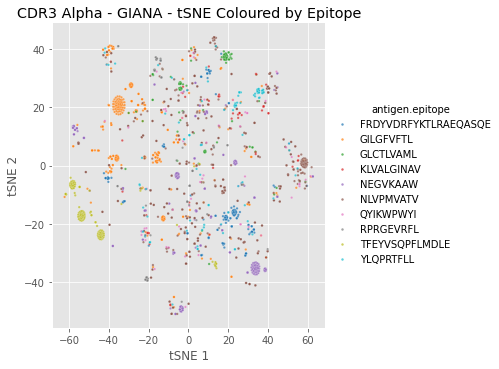

In [37]:
plt.figure(figsize=(20, 20), dpi = 500)

#sns.set_style = "whitegrid"



figure = sns.relplot(data=df_test,x=tsne_result[:, 0],y= tsne_result[:, 1], s= 6, alpha= 0.7, hue='antigen.epitope', palette = 'tab10', legend = "full")
plt.title('CDR3 Alpha - GIANA - tSNE Coloured by Epitope')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.savefig('GIANA_alpha2.png', dpi =1000, bbox_inches = 'tight', facecolor = 'white')